In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


In [2]:
# 1. Load the dataset
data = pd.read_csv('GOOG.csv')
prices = data['Close'].values.reshape(-1, 1)  # Using 'Open' prices


In [3]:
# 2. Normalize the data
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)


In [4]:
n=len(prices)

In [5]:
# 3. Create sequences
X = []
y = []

for i in range(60, len(scaled_prices)):
    X.append(scaled_prices[i-60:i, 0])  # 60 time steps
    y.append(scaled_prices[i, 0])

X_train = np.array(X)[:int(n*0.8)]
y_train = np.array(y)[:int(n*0.8)]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))  # RNN input shape

X_test = np.array(X)[int(n*0.8):]
y_test = np.array(y)[int(n*0.8):]
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))  # RNN input shape


In [6]:
# 4. Build RNN model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(60, 1)))
model.add(Dense(1))



C:\Users\Anushka\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:

# 5. Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0000e+00 - loss: 1.2722e-04
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 2.3816e-05
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 2.1383e-05
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 2.1641e-05
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 2.3372e-05
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.7904e-05
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 2.6709e-05
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.8733e-05
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.6941e-05
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 1.6181e-05
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accu

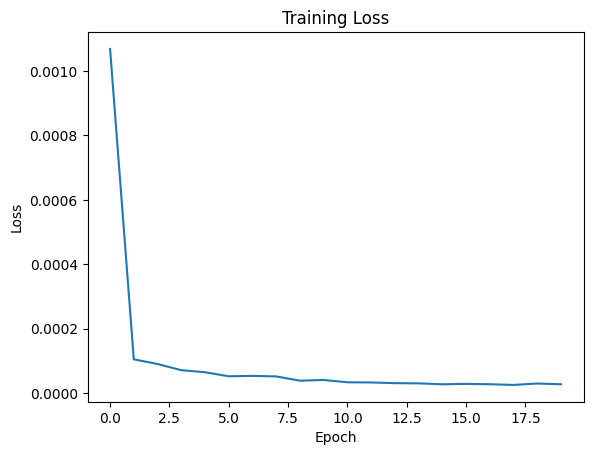

In [8]:
# 6. Plot training loss
plt.plot(model.history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [9]:
# 7. Make predictions (on training set, for demo)
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))



29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


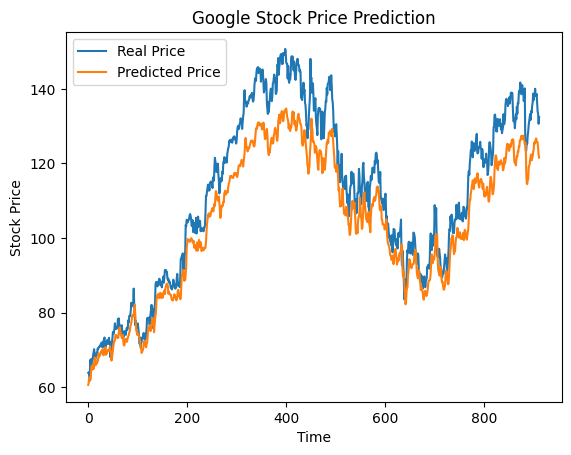

In [15]:
# 8. Plot real vs predicted
plt.plot(real_prices, label='Real Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [17]:
predicted_prices

array([[ 60.577354],
       [ 61.202854],
       [ 62.626053],
       [ 62.586082],
       [ 61.92697 ],
       [ 62.068363],
       [ 64.730034],
       [ 65.654915],
       [ 64.698   ],
       [ 65.98054 ],
       [ 66.01407 ],
       [ 64.86402 ],
       [ 66.70392 ],
       [ 67.89594 ],
       [ 67.8947  ],
       [ 65.85247 ],
       [ 66.4288  ],
       [ 66.67265 ],
       [ 66.367134],
       [ 67.30649 ],
       [ 67.13024 ],
       [ 69.07719 ],
       [ 68.14828 ],
       [ 68.81005 ],
       [ 68.456985],
       [ 68.98662 ],
       [ 69.59832 ],
       [ 69.238945],
       [ 70.01584 ],
       [ 69.54105 ],
       [ 69.33642 ],
       [ 68.52298 ],
       [ 70.105484],
       [ 70.39025 ],
       [ 70.55734 ],
       [ 70.69456 ],
       [ 68.64255 ],
       [ 69.367065],
       [ 69.04406 ],
       [ 69.877144],
       [ 69.959785],
       [ 69.841774],
       [ 69.65304 ],
       [ 70.272675],
       [ 70.98385 ],
       [ 69.94579 ],
       [ 69.56081 ],
       [ 67.0